<a href="https://colab.research.google.com/github/pedromonteiro18/Pattern_Recognition/blob/master/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.linalg import eigh


mat_content = sio.loadmat('face.mat')
1
# mat_content # Let's see the content... 
np.random.seed(1)

In [0]:
face_data = mat_content['X']
face_labels = mat_content['l']

#transpose to select test and training data
face_data = face_data
face_labels = face_labels

In [0]:
#20/80 test/training split
data_train, data_test, label_train, label_test = train_test_split(
    face_data.T, face_labels.T, test_size=0.2, random_state =1 )

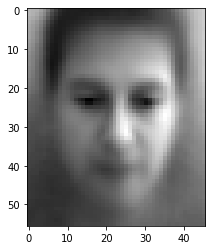

In [116]:
#compute average face vector
avg = np.mean(data_train, axis = 0)
plt.imshow(np.reshape(avg,(46,56)).T, cmap = 'gist_gray')

In [0]:
#subtract the mean face 
A = np.array([(data_train[0] - avg),(data_train[1] - avg)])

for i in range(2,len(data_train)):
    app = np.array([data_train[i] - avg])
    newA = np.append(A, app, axis = 0)
    A = newA
A = A.T

In [0]:
#compute covariance matrix 
S = np.dot(A, A.T)*1/len(data_train)

#Low-dimensional computation of eigenspace 
S2 = np.dot(A.T, A)*1/len(data_train)

In [0]:
# eigenvectors and eigenvalues
eigvals, eigvecs = np.linalg.eig(S)
eigvalsLow, eigvecsLow = np.linalg.eig(S2)
# print(eigvalsLow, eigvecsLow)

In [120]:
from sklearn import preprocessing
N=S2.shape[0]
M = 416
Meigvals, Meigvecs = eigh(S2, eigvals=(N-M, N-1))

eigvecsM = Meigvecs.astype(float)
eigvecsM = preprocessing.normalize(np.dot(A, eigvecsM).T)

#represent each normalized face by its projections
Wn = np.dot(A[:,[100]].T, eigvecsM.T)
print(Wn.shape)
# print(np.sort(eigvalsLow)[::-1])


(1, 416)


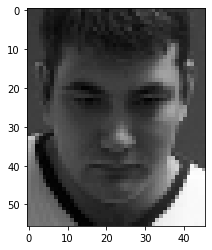

In [121]:
#reconstruction test face 
face_100 = data_train.T[:,100]
face_100 = np.reshape(face_100,(46,56))
plt.imshow(face_100.T, cmap= 'gist_gray')

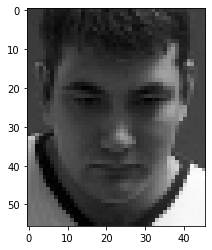

In [122]:
# sumCols = np.array([[None for x in range(2576)] for y in range(1)]).T
# sumCols = Wn[:,0].reshape(-1,1)
# for i in range(1, len(Wn[0])):
#     cols = Wn[:,i].reshape(-1,1)
#     sumCols += np.reshape(cols, (2576, 1))
sumCols = np.dot(Wn, eigvecsM)

#reconstruct 
new_100 = avg.reshape((2576,1)) + sumCols.T
new_100_reshaped = np.reshape(new_100,(46,56))
#new_100 = (255-np.reshape(new_100,(46,56)))
plt.imshow(new_100_reshaped.T, cmap = 'gist_gray')

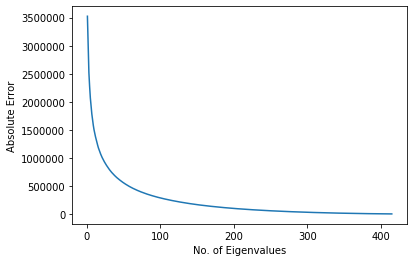

In [123]:
# Calculating the reconstruction error
x = []
y = []
for M in range(1,N):
  Meigvals_new, Meigvecs_new = eigh(S2, eigvals=(N-M, N-1))
  J = np.absolute(np.sum(Meigvals)-np.sum(Meigvals_new))
  x.append(M)
  y.append(J)

plt.xlabel('No. of Eigenvalues')
plt.ylabel('Absolute Error')
plt.plot(x,y)


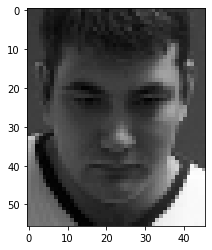

In [124]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
  
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors


im = get_neighbors(data_train, label_train, data_train[100], 1, distance=distance)
image, _, _= im[0]
im = np.reshape(image,(46,56))
plt.imshow(im.T, cmap= 'gist_gray')

2576
(1, 104)
<class 'numpy.ndarray'>


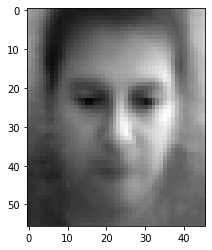

In [180]:
#---------------------------------- QUESTION 2 -------------------------------------------#
# Split the data into 4 parts (104 images each)
train_data = np.split(data_train, 4)
test_data = np.split(data_test, 4)
train_label = np.split(label_train, 4)
test_label = np.split(label_test, 4)

# PCA trained by only the first subset

#compute average face vector
avg_1 = np.mean(train_data[0], axis = 0)
plt.imshow(np.reshape(avg_1,(46,56)).T, cmap = 'gist_gray')

#subtract the mean face of dataset 1
A=[None] * 4
A[0] = np.empty([0,2576])

for i in range(len(train_data[0])):
    app = np.array([train_data[0][i] - avg_1])
    newA = np.append(A[0], app, axis = 0)
    A[0] = newA
A[0] = A[0].T

print(len(A[0]))

#Low-dimensional computation of eigenspace of dataset 1
S = np.dot(A[0].T, A[0])*1/len(train_data[0])

N=S.shape[0]
M=len(A[0][0])
Meigvals, Meigvecs = eigh(S, eigvals=(N-M, N-1))

eigvecsM = Meigvecs.astype(float)
eigvecsM = preprocessing.normalize(np.dot(A[0], eigvecsM).T)

#represent each normalized face by its projections
Wn = np.dot(A[0][:,[100]].T, eigvecsM.T)
print(Wn.shape)
# print(np.sort(eigvalsLow)[::-1])


print(type(S))

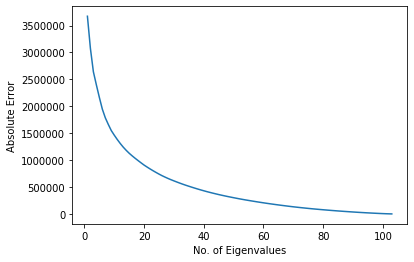

In [133]:
# Calculating the reconstruction error for dataset 1
x = []
y = []
for M in range(1,N):
  Meigvals_new, Meigvecs_new = eigh(S, eigvals=(N-M, N-1))
  J = np.absolute(np.sum(Meigvals)-np.sum(Meigvals_new))
  x.append(M)
  y.append(J)

plt.xlabel('No. of Eigenvalues')
plt.ylabel('Absolute Error')
plt.plot(x,y)

In [191]:
#Incremental PCA
S_1 = S
print(type(S))
# avg_1 = avg_1
N_1 = N
Sbatch = [None]*4

# Assuming the first batch has been carried out (in the cells above)
# The following loop incrementally adds new data batches to calculate S_3
for batch in range(1, 3):
  A[batch] = np.empty([0,2576])
  avg_2 = np.mean(train_data[batch], axis = 0)

  for i in range(len(train_data[batch])):
    app = np.array([train_data[batch][i] - avg])
    newA = np.append(A[batch], app, axis = 0)
    A[batch] = newA

  N_2 = len(A[batch])
  A[batch] = A[batch].T
  Sbatch[batch] = np.dot(A[batch].T, A[batch])*1/len(train_data[batch])

  
  # mu_3 = (N1*mu_1 + N2*mu2)/N3
  S_2 = Sbatch[batch]
  N_3 = N_1 + N_2
  avg_3 = (N_1*avg_1 + N_2*avg_2)/N_3

  S_3 = (N_1/N_3)*S_1 + (N_2/N_3)*S_2 + ((N_1*N_2)/(N_3**2))*np.dot((avg_1-avg_2),(avg_1-avg_2).T)
  S_1 = S_3
  N_1 = N_3
  avg_1 = avg_3

print(S_3.shape)

<class 'numpy.ndarray'>
(104, 104)
